In [30]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
import tensorflow as tf
from matplotlib.patches import Patch
import numpy

In [31]:

df = pd.read_csv('DATA.csv',delimiter=';')
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format="%Y-%m-%d")
df.sort_values(by='Tanggal', ascending=True, inplace=True)
all_features = df.drop(columns=['Tanggal']).values

In [4]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
df.head()

,Tanggal,IDR,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
124,2010-01-01,9350.0,6.5,2.033,12427269770,10041052516,6.700431e+10,99.93,4.738427,1.875
123,2010-02-01,9337.0,6.5,2.660,12034283909,10454441844,6.714395e+10,100.01,5.301838,1.664
122,2010-03-01,9090.0,6.5,3.035,12502792707,10795233578,6.922254e+10,100.02,9.120959,1.614
121,2010-04-01,9012.5,6.5,3.050,12339939723,10952947566,7.584955e+10,99.92,8.127157,1.574
120,2010-05-01,9175.0,6.5,2.680,12700566642,10335259427,7.175324e+10,99.75,6.644380,1.554


In [6]:
df.tail()

,Tanggal,IDR,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
4,2020-01-01,13650.0,5.00,4.159,14260110167,13673913951,1.277356e+11,101.34,1.054202,3.80
3,2020-02-01,14340.0,4.75,3.906,15161518751,12908365959,1.263023e+11,100.89,2.779785,3.49
2,2020-03-01,16300.0,4.50,3.430,13679902374,12957009839,1.168747e+11,100.12,-1.423400,3.16
1,2020-04-01,14825.0,4.50,3.824,12354195223,12230446623,1.235632e+11,99.08,-17.573075,3.50
0,2020-05-01,14575.0,4.50,3.718,10736197967,9088168344,1.262111e+11,98.45,-32.733629,3.15


In [7]:
# Extract the 'IDR' column without reversing
#prices = df['IDR'].values
#prices = prices.reshape(-1, 1)
#df1=df.reset_index()['IDR']

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline


In [9]:
import matplotlib.pyplot as plt
#plt.plot(df)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_features = scaler.fit_transform(all_features)

In [12]:
print(normalized_features)

[[0.10954516 0.64285714 0.         ... 0.44984802 0.82001202 0.15134157]
 [0.10787956 0.64285714 0.09911476 ... 0.47416413 0.83234133 0.08772988]
 [0.07623318 0.64285714 0.15839393 ... 0.47720365 0.91591627 0.07265601]
 ...
 [1.         0.07142857 0.22083465 ... 0.50759878 0.68517095 0.53873983]
 [0.81101858 0.07142857 0.28311729 ... 0.19148936 0.33176287 0.64124209]
 [0.77898783 0.07142857 0.26636105 ... 0.         0.         0.53572505]]


In [13]:
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(normalized_features)):
    X.append(normalized_features[i-sequence_length:i, :])
    y.append(normalized_features[i, 0])

In [14]:
X,y
#training_siz,test_size

([array([[0.10954516, 0.64285714, 0.        , 0.3294411 , 0.12264419,
          0.        , 0.44984802, 0.82001202, 0.15134157],
         [0.10787956, 0.64285714, 0.09911476, 0.2853015 , 0.17585087,
          0.00227079, 0.47416413, 0.83234133, 0.08772988],
         [0.07623318, 0.64285714, 0.15839393, 0.33792373, 0.21971363,
          0.03607244, 0.47720365, 0.91591627, 0.07265601],
         [0.06630365, 0.64285714, 0.1607651 , 0.31963232, 0.24001274,
          0.14383951, 0.44680851, 0.8941686 , 0.06059692],
         [0.08712364, 0.64285714, 0.10227632, 0.36013742, 0.16051109,
          0.07722612, 0.39513678, 0.86172056, 0.05456738],
         [0.07238949, 0.64285714, 0.10828328, 0.31715943, 0.29398607,
          0.1045099 , 0.37993921, 0.92448503, 0.05155261],
         [0.05701473, 0.64285714, 0.15317736, 0.31562457, 0.35158225,
          0.14725626, 0.40729483, 0.79712065, 0.09677419],
         [0.06918642, 0.64285714, 0.17341132, 0.43735228, 0.33628731,
          0.18560982, 0.443

In [15]:
X, y = np.array(X), np.array(y)
print(X.shape) # Periksa bentuk X
#X = np.reshape(X, (X.shape[0], X.shape[1], 1))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=False)


(65, 60, 9)


In [18]:
import keras_tuner as kt
from keras import layers, Sequential
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping 

##Keras Tunner
def build_model_BiLSTM(hp):
  model = Sequential()
  model.add(layers.Bidirectional(layers.LSTM(
    units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32),
    return_sequences=True), input_shape=(X_train.shape[1], 13)))
  model.add(layers.Dropout(hp.Float('dropout_rate1', min_value=0.0, max_value=0.5, step=0.1)))

  model.add(layers.Bidirectional(layers.LSTM(
    units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
    return_sequences=True)))
  model.add(layers.Dropout(hp.Float('dropout_rate2', min_value=0.0, max_value=0.5, step=0.1)))

  model.add(layers.Bidirectional(layers.LSTM(
    units=hp.Int('lstm_units_3', min_value=32, max_value=128, step=32))))
  model.add(layers.Dropout(hp.Float('dropout_rate3', min_value=0.0, max_value=0.5, step=0.1))) 

  model.add(layers.Dense(units=1))

  model.compile(
    optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
    loss='mean_squared_error',
    metrics=[RootMeanSquaredError()]
  )
  return model

# Tuner Setup (Same as before)
tuner = kt.Hyperband(
  build_model_BiLSTM,
  objective='val_loss',
  max_epochs=200,
  project_name='Bilstm_Book+'
  
)

# ... Prepare your data (X_train, X_test, y_train, y_test)

# Early Stopping Callback 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, verbose=1, mode='auto', restore_best_weights=True)

# Start the tuning process
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[monitor])

# Get best model and hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
best_model = tuner.get_best_models()[0]

Trial 254 Complete [00h 00m 17s]
val_loss: 0.009043697267770767

Best val_loss So Far: 0.005792354699224234
Total elapsed time: 00h 47m 36s


In [19]:
# Print struktur model terbaik
best_model.summary()

# Print hyperparameter terbaik 
print(best_hps.values)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 192)          81408     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 192)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 192)          221952    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 192)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              328704    
 nal)                                                            
                                                        

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dropout, Dense
import tensorflow as tf


tf.random.set_seed(1234)
# Model Definition
# Model Definition
model = Sequential()
# First BiLSTM Layer 
model.add(Bidirectional(LSTM(units=best_hps.get('lstm_units_'), 
                             return_sequences=True, 
                             input_shape=(X_train.shape[1], 1))))  
model.add(Dropout(best_hps.get('dropout_rate1')))  

# Second BiLSTM Layer
model.add(Bidirectional(LSTM(units=best_hps.get('lstm_units_2'), 
                             return_sequences=True))) 
model.add(Dropout(best_hps.get('dropout_rate2')))

# Third BiLSTM Layer (Note: No 'return_sequences' here)
model.add(Bidirectional(LSTM(units=best_hps.get('lstm_units_3'))))
model.add(Dropout(best_hps.get('dropout_rate3')))

# Dense Output Layer
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=best_hps.get('learning_rate')),  # Ambil learning_rate
              metrics=['RootMeanSquaredError'])  
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                  callbacks=[monitor],verbose=1,epochs=200)

          
#model.compile(loss='mean_squared_error',
#              optimizer=Adam(learning_rate=best_hps.get('learning_rate')),  # Ambil learning_rate
#              metrics=['RootMeanSquaredError'])  
#history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
#                  callbacks=[monitor],verbose=1,epochs=200)


Epoch 1/200
2/2 [==============================] - 8s 2s/step - loss: 2.1225 - root_mean_squared_error: 1.4569 - val_loss: 3.6824 - val_root_mean_squared_error: 1.9189
Epoch 2/200
2/2 [==============================] - 0s 128ms/step - loss: 2.0762 - root_mean_squared_error: 1.4409 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1286
Epoch 3/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0620 - val_root_mean_squared_error: 0.2490
Epoch 4/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0399 - root_mean_squared_error: 0.1998 - val_loss: 0.0888 - val_root_mean_squared_error: 0.2980
Epoch 5/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0677 - root_mean_squared_error: 0.2603 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3082
Epoch 6/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072 - val_loss: 0.0298 - val_root_mean_squ

In [23]:
model.layers[layer_index].get_weights()

NameError: name 'layer_index' is not defined

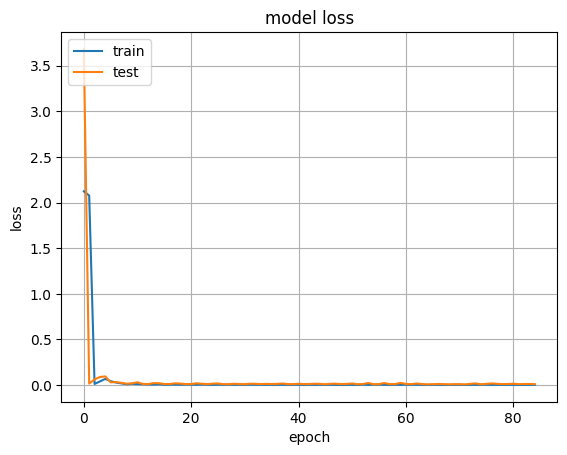

In [24]:
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 19ms/step


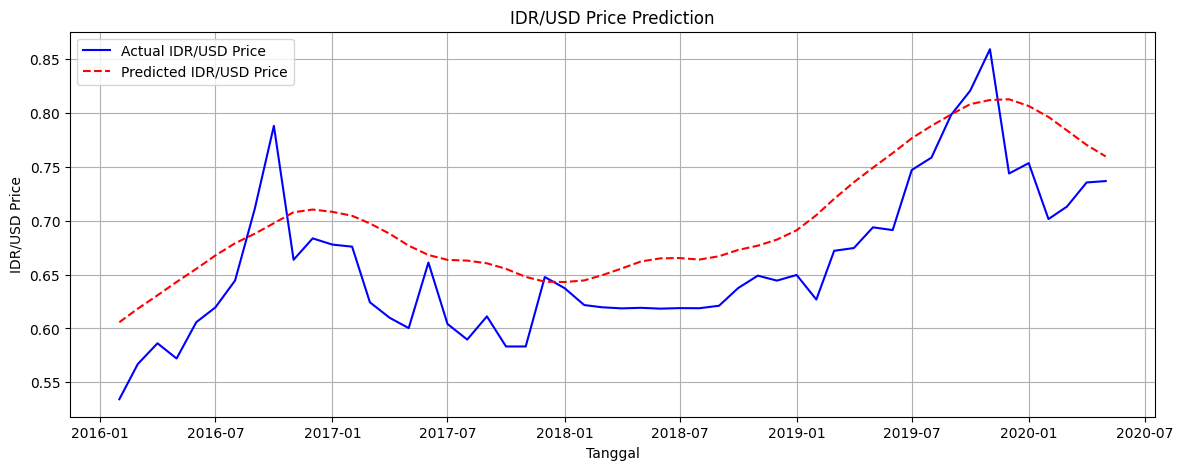

In [25]:
# Use the trained model to generate predictions on the validation dataset.
# `X_val` contains the input features for the validation set.
# The resulting predictions are stored in `y_val_pred` for further evaluation against actual values.
y_val_pred = model.predict(X_train)

# Assuming val_dates is the list/array of dates corresponding to your validation set
val_dates = df['Tanggal'][-len(y_train):].values
val_dates = pd.to_datetime(val_dates)  # Convert to datetime format

plt.figure(figsize=(14,5))
plt.plot(val_dates, y_train, color='blue', label='Actual IDR/USD Price')
plt.plot(val_dates, y_val_pred, color='red', linestyle='dashed', label='Predicted IDR/USD Price')
plt.title('IDR/USD Price Prediction')
plt.xlabel('Tanggal')
plt.ylabel('IDR/USD Price')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
scores = best_model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.005792354699224234, 0.07610752433538437]


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score 

loss = scores[0]  
rmse = scores[1]  

# Calculate MAE
mae = mean_absolute_error(y_test, best_model.predict(X_test))

mape = mean_absolute_percentage_error(y_test, best_model.predict(X_test))
r2 = r2_score(y_test, best_model.predict(X_test)) 

# Print results
print(f"Loss: {loss:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2%}")
print(f"R^2: {r2:.4f}")

1/1 [==============================] - 0s 31ms/step
Loss: 0.0058
MAE: 0.0446
RMSE: 0.0761
MAPE: 5.49%
R^2: 0.1142


In [28]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=1)
test_mse = model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 54ms/step - loss: 0.0084 - root_mean_squared_error: 0.0918


In [29]:
train_mse > test_mse

False